In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

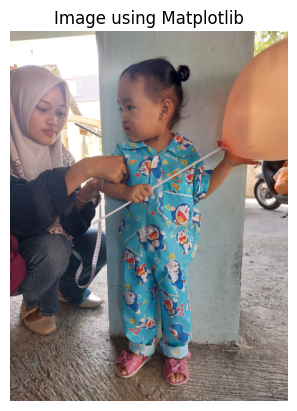

In [8]:
import cv2
from matplotlib import pyplot as plt

# Load an image
image_path = '/content/drive/MyDrive/Colab Notebooks/Stuntrack/Data Train/TIDAK STUNTING/TB13.jpg'
image = cv2.imread(image_path)

# Convert BGR image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Display the image using cv2.imshow
# cv2.imshow('Image using cv2.imshow', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Alternatively, use Matplotlib for display
plt.imshow(image_rgb)
plt.title('Image using Matplotlib')
plt.axis('off')
plt.show()


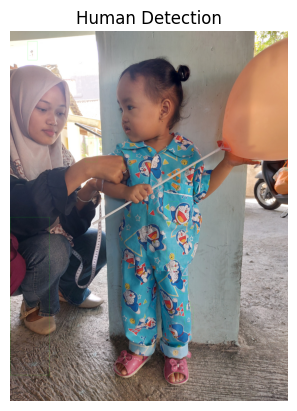

In [9]:
def draw_detections(img, rects, thickness=1):
    for x, y, w, h in rects:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Stuntrack/Data Train/TIDAK STUNTING/TB13.jpg')
found, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(32, 32), scale=1.05)
draw_detections(image, found)

# Convert BGR image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Human Detection')
plt.axis('off')
plt.show()

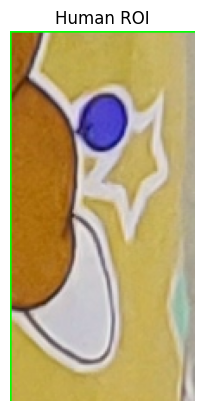

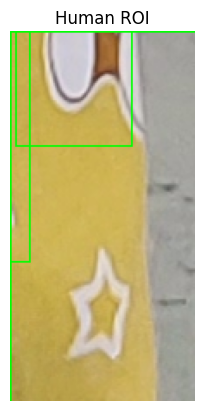

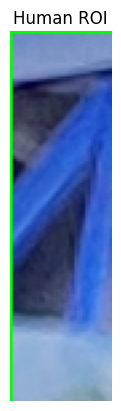

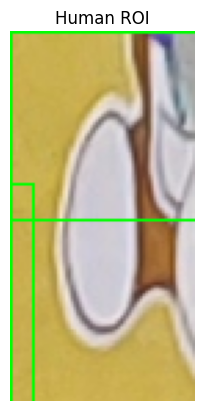

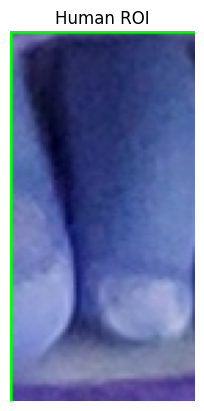

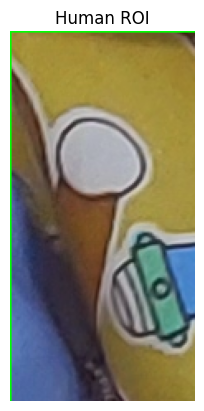

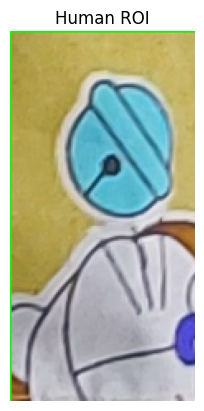

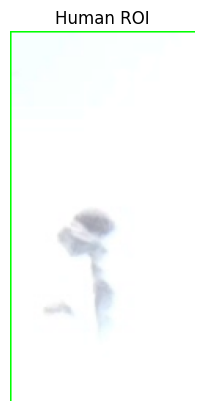

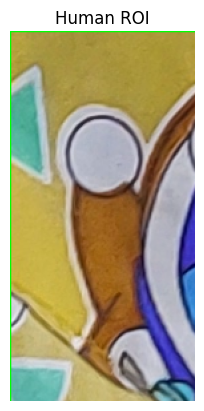

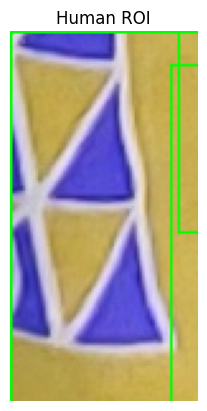

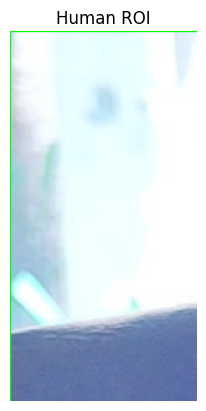

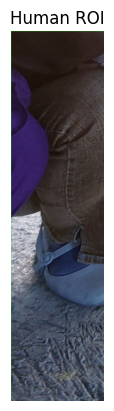

In [10]:
for x, y, w, h in found:
    human_roi = image[y:y+h, x:x+w]
    # Display the image using Matplotlib
    plt.imshow(human_roi)
    plt.title('Human ROI')
    plt.axis('off')
    plt.show()

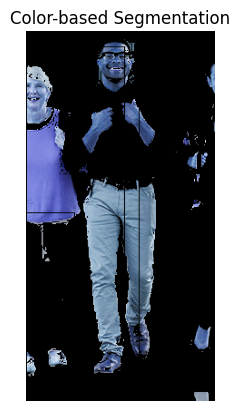

In [6]:
# Assuming human_roi is the region of interest
hsv_roi = cv2.cvtColor(human_roi, cv2.COLOR_BGR2HSV)
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)
mask = cv2.inRange(hsv_roi, lower_skin, upper_skin)
result = cv2.bitwise_and(human_roi, human_roi, mask=mask)

plt.imshow(result)
plt.title('Color-based Segmentation')
plt.axis('off')
plt.show()

In [ ]:
# Assuming human_roi is the region of interest
gray_roi = cv2.cvtColor(human_roi, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_roi, 50, 150)

cv2.imshow('Edge-based Segmentation', edges)
cv2.waitKey(0)
